In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from math import exp

In [4]:
#https://www.kaggle.com/rakeshrau/social-network-ads
data=pd.read_csv('Downloads\data.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
data.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


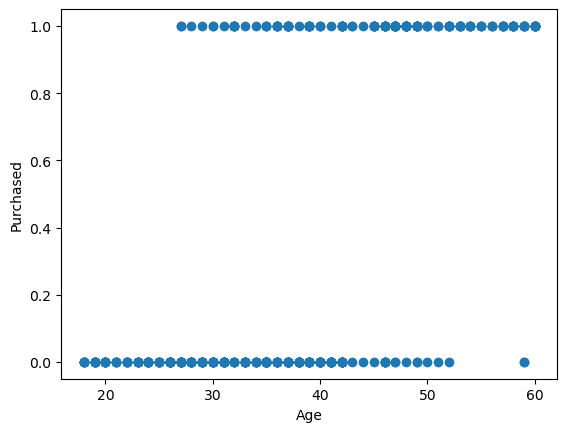

In [6]:
plt.scatter(data['Age'],data['Purchased'])
plt.xlabel("Age")
plt.ylabel("Purchased")
plt.show()

x_train,x_test,y_train,y_test=train_test_split(data["Age"],data["Purchased"],test_size=0.20)

In [7]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train.values.reshape(-1,1),y_train.values.reshape(-1,1).ravel())


LogisticRegression()

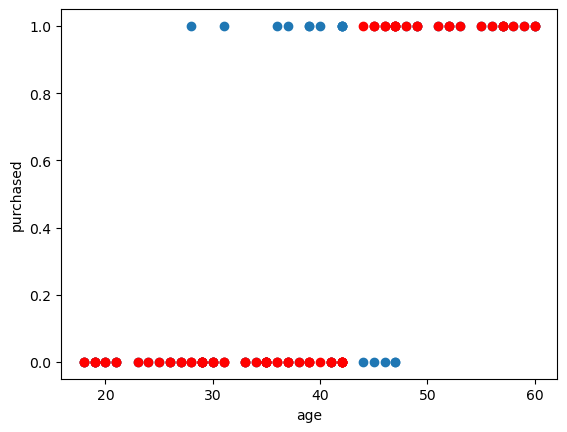

 Accuracy=0.8


In [20]:
y_pred_sk=model.predict(x_test.values.reshape(-1,1))
plt.clf()
plt.scatter(x_test,y_test)
plt.scatter(x_test,y_pred_sk, c="red")

plt.xlabel("age")
plt.ylabel("purchased")
plt.show()
print(f" Accuracy={model.score(x_test.values.reshape(-1,1),y_test.values.reshape(-1,1))}")

In [22]:
from sklearn.metrics import confusion_matrix
tn,fp,fn,tp=confusion_matrix(y_test,y_pred_sk).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Negatives: ",tp)

True Negatives:  44
False Positives:  5
False Negatives:  11
True Negatives:  20


In [24]:
Accuracy=(tn+tp)*100/(tp+tn+fp+fn)
print("Accuracy {:0.2f}%:".format(Accuracy))

Accuracy 80.00%:


In [26]:
Precision=tp/(tp+fp)
print("Precision {:0.2f}".format(Precision))

Precision 0.80


In [27]:
Recall=tp/(tp+fn)
print("Recall {:0.2f}".format(Recall))

Recall 0.65


In [28]:
err=(fp+fn)/(tp+tn+fn+fp)
print("Error rate {:0.2f}".format(err))

Error rate 0.20
